# Segmentation
In this notebook, we perform very simple segmentation using a basic model and an easy image.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In the `img_seg` folder are 4 pictures:
- an apple
- a flower
- a house
- a chimpanzee

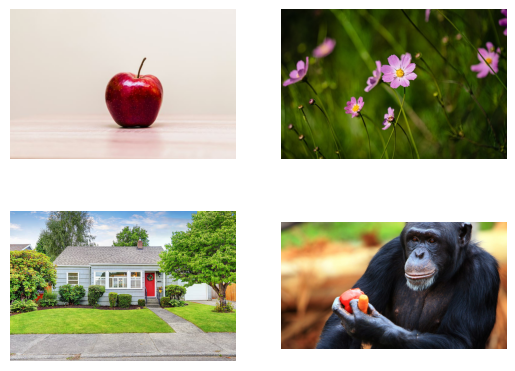

In [4]:
# load all 4 images and plot in a 2x2 grid
images = ['apple', 'flower', 'house', 'monke']
fig, axs = plt.subplots(2, 2)
for i in range(4):
    img = plt.imread(f"img_seg/{images[i]}.jpg")
    axs[i//2, i%2].imshow(img)
    axs[i//2, i%2].axis("off")

plt.show()

The apple looks to be the most basic, and we can visually identify two or three colors. We will use the apple.

In [5]:
img = plt.imread('img_seg/apple.jpg')
img.shape

(501, 752, 3)

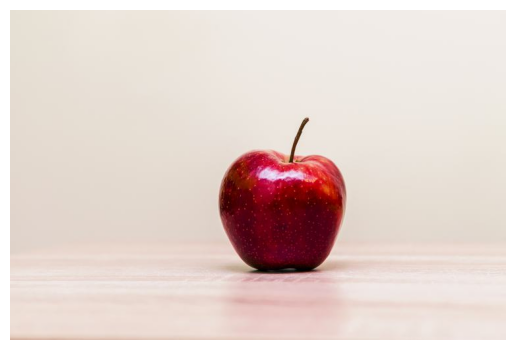

In [6]:
plt.imshow(img)
plt.axis('off')
plt.show()


We can actually use [k-means clustering](https://scikit-learn.org/1.5/modules/clustering.html#k-means) to find "clusters" of pixels based on their RGB values! We have to define the number of clusters that we want to extract from the image though.

In [7]:
def segment_image(img, n_clusters=2):
    pixels = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pixels)
    
    centers = np.array(kmeans.cluster_centers_, dtype='uint')
    labels = kmeans.labels_

    new_img = np.zeros(pixels.shape, dtype='uint')
    label_array = np.zeros(pixels.shape, dtype='uint')

    for i in range(new_img.shape[0]):
        new_img[i] = centers[labels[i]]
        label_array[i] = labels[i]

    
    new_img = new_img.reshape(img.shape)
    labels = label_array.reshape(img.shape)
    labels = labels[:,:,0]

    return new_img, labels, centers

Try with 2 colors first.

In [10]:
new_img, labels, centers = segment_image(img, n_clusters=2)

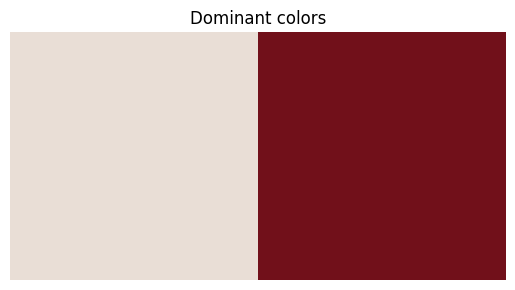

In [11]:
plt.imshow([centers])
plt.axis('off')
plt.title('Dominant colors')
plt.show()

So the model has pulled out two very clear colors: a sort of grey/beige for the background, and the red for the apple. We can now plot the segmented image and show the label mask.

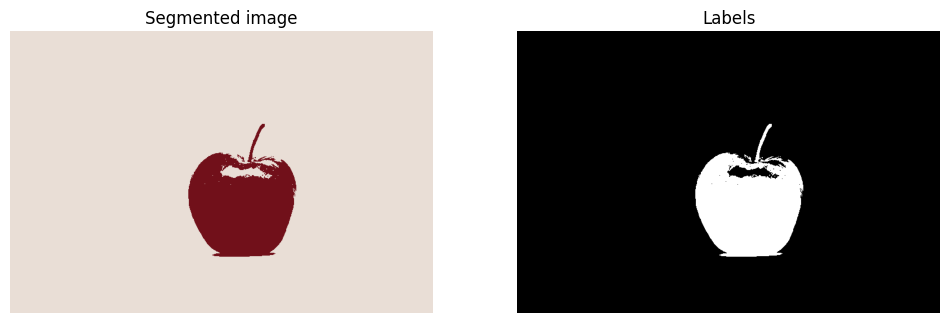

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(new_img)
ax[0].axis('off')
ax[0].set_title('Segmented image')

ax[1].imshow(labels, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Labels')
plt.show()

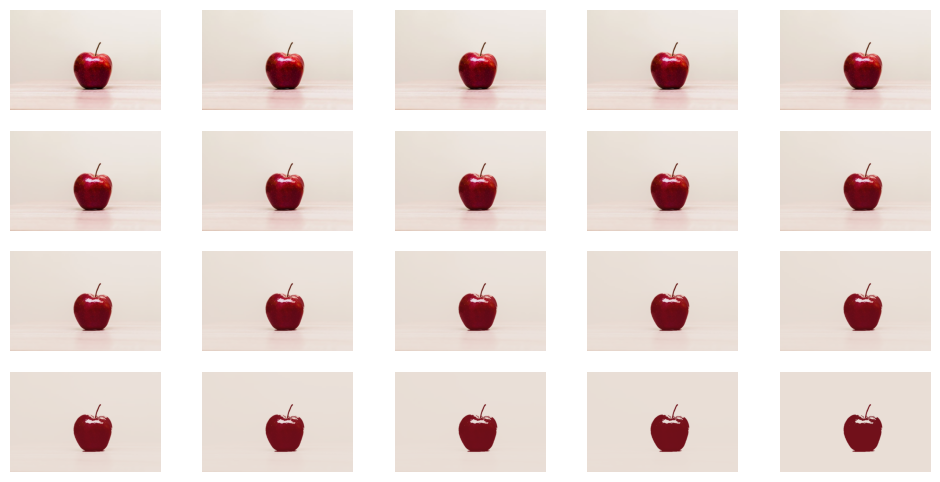

In [142]:
# plot original image "underneath" the segmented image
alphas = np.linspace(0, 1, 20)

fig, axs = plt.subplots(4, 5, figsize=(12, 6))
for i, alpha in enumerate(alphas):
    axs[i//5, i%5].imshow(img)
    axs[i//5, i%5].imshow(new_img, alpha=alpha)
    axs[i//5, i%5].axis('off')
plt.show()

Now what if we try with a more complicated image: the chimp.

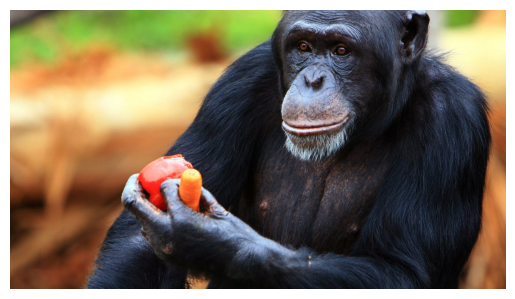

In [14]:
img = plt.imread('img_seg/monke.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

It is hard to know exactly how many colors appear here. There is the dark color of the fur; the green in the upper background; the brown of the lower background; the red of the apple or pepper; the orange of the carrot; and the lighter colors on the face and hands.

So let's try 6 for now.

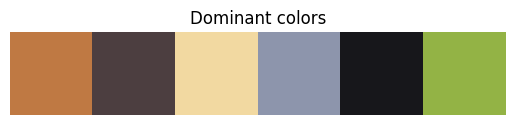

In [32]:
new_img, labels, centers = segment_image(img, n_clusters=6)
plt.imshow([centers])
plt.axis('off')
plt.title('Dominant colors')
plt.show()

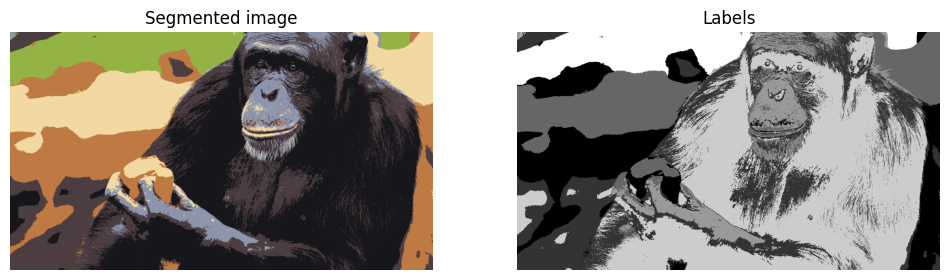

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(new_img)
ax[0].axis('off')
ax[0].set_title('Segmented image')

ax[1].imshow(labels, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Labels')
plt.show()

This example is not quite as straight forward as extracting an apple. Notice that if you increase the number of clusters, the segmented image will just begin to approach the original one.